In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re

In [5]:
df = pd.DataFrame( pd.read_csv("meteo-nogal-09.csv", engine="python" ) )
df.head(10)

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,TS,NaN,NaN,NaN,m/s,m/s,m/s,degC,mV,w/m2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-01-09,00:10,1.0,NaN,1.215,0.506,-0.044,10.95,1.159,-176.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-09,00:20,1.0,NaN,0.892,0.588,-0.072,10.81,1.159,-176.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-09,00:30,1.0,NaN,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-09,00:40,1.0,NaN,1.135,0.7410001,-0.093,9.8,1.258,-182.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01-01-09,00:50,1.0,NaN,0.7550001,1.064,-0.149,8.87,1.332,-184.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01-01-09,01:00,1.0,NaN,0.8850001,0.992,-0.167,8.76,1.45,-183.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01-01-09,01:10,1.0,NaN,0.611,0.7270001,-0.126,8.72,1.5,-180.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,01-01-09,01:20,1.0,NaN,0.33,0.886,-0.086,8.8,1.49,-185.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,01-01-09,01:30,1.0,NaN,0.118,1.321,-0.071,8.69,1.422,-187.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Todas las colmunas que tengan como nombre Unnamed no nos serán útiles en nuestro 
#análisis, por lo que procederemos a eliminarlas seleccionando la posición que tienen
#en el dataframe.
df.drop( df.columns[18:36], axis=1, inplace=True )
df.drop( df.columns[2:4], axis=1, inplace=True )
df.head()

,DATE,TIME,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,TS,NaN,m/s,degC,mV,w/m2,w/m2,w/m2,m/s,degC,NaN,kPa,kPa,g/m3
1,01-01-09,00:10,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
2,01-01-09,00:20,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
3,01-01-09,00:30,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
4,01-01-09,00:40,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737


In [11]:
#Como en el tabla de datos nos brinda columnas de hora y fecha por separado, procerederemos
#a juntarlas en una nueva columan que se llame fecha.
#df["FECHA"] = df["DATE"] + " "+ df["TIME"]
df = df.drop(df.index[0]).reset_index(drop=True)

df.head()

,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,01-01-09 00:10
1,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,01-01-09 00:20
2,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,01-01-09 00:30
3,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,01-01-09 00:40
4,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,01-01-09 00:50


In [13]:
df[df.columns[0:14]] = df[df.columns[0:14]].apply(pd.to_numeric, errors='coerce')
df.dtypes

w_Avg          float64
t_Avg          float64
kh20_Avg       float64
net_rad_Avg    float64
shf1_Avg       float64
shf2_Avg       float64
vv_Avg         float64
airT_Avg       float64
rh_Avg         float64
e_sat_Avg      float64
e_Avg          float64
h2o_hmp_Avg    float64
FECHA          float64
dtype: object

In [15]:
df_corr = df.corr(method='pearson', min_periods=1)
df_corr.head(140)

,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
w_Avg,1.000000,0.667294,0.121010,0.044286,-0.079466,-0.011563,0.923685,-0.374504,0.760058,-0.222593,0.641772,0.125133,NaN
t_Avg,0.667294,1.000000,-0.002184,0.064174,-0.094414,-0.008491,0.593997,-0.288852,0.433942,-0.183273,0.340214,0.576896,NaN
kh20_Avg,0.121010,-0.002184,1.000000,-0.157635,-0.005268,-0.058466,0.149991,-0.116329,0.031765,-0.119534,-0.134477,-0.326760,NaN
net_rad_Avg,0.044286,0.064174,-0.157635,1.000000,-0.206065,-0.027180,0.156017,0.326684,-0.254705,0.381454,0.076382,0.056376,NaN
shf1_Avg,-0.079466,-0.094414,-0.005268,-0.206065,1.000000,0.059003,-0.089608,-0.121637,0.084782,-0.138901,-0.016448,0.014207,NaN
shf2_Avg,-0.011563,-0.008491,-0.058466,-0.027180,0.059003,1.000000,-0.017869,0.077130,0.014974,0.081516,0.048861,0.151206,NaN
vv_Avg,0.923685,0.593997,0.149991,0.156017,-0.089608,-0.017869,1.000000,-0.264771,0.624201,-0.125826,0.525220,-0.193064,NaN
airT_Avg,-0.374504,-0.288852,-0.116329,0.326684,-0.121637,0.077130,-0.264771,1.000000,-0.501728,0.963527,0.050730,0.464621,NaN
rh_Avg,0.760058,0.433942,0.031765,-0.254705,0.084782,0.014974,0.624201,-0.501728,1.000000,-0.398746,0.722503,0.563712,NaN
e_sat_Avg,-0.222593,-0.183273,-0.119534,0.381454,-0.138901,0.081516,-0.125826,0.963527,-0.398746,1.000000,0.169732,0.445780,NaN


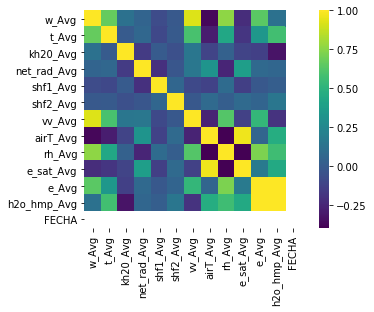

In [17]:
#Este es el mapa de correlaciones visto con la función Seaborn
sns_plot = sns.heatmap(df_corr,cmap="viridis",robust=True,square=True,annot=False)
fig = sns_plot.get_figure()
fig.savefig("snscorrelaciones",plt=2000)

In [18]:

def array(arr,st,fin):
    arra = []
    for i in range(st,fin):
        arra.append(arr[i])
    return arra

In [21]:
Cols = []
n = -1
for i in df_corr.index:
    n=n+1
    for j in array(df_corr.index,n,len(df_corr)):
        if(abs(df_corr[i][j]) > 0.6 and i != j):
            Cols.append([i,j])

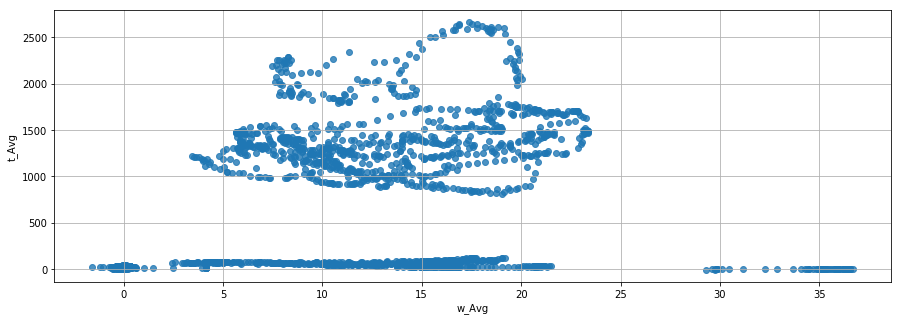

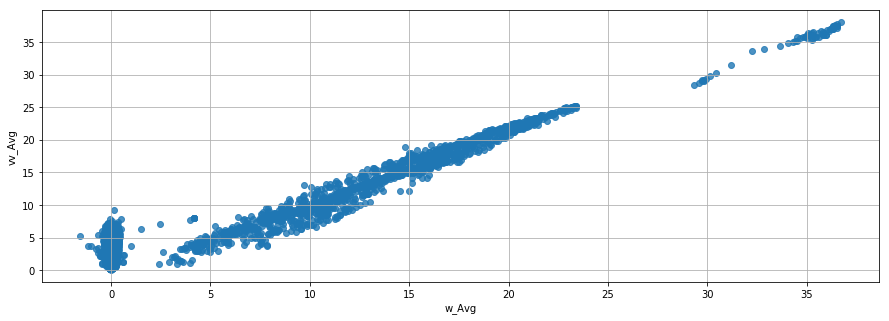

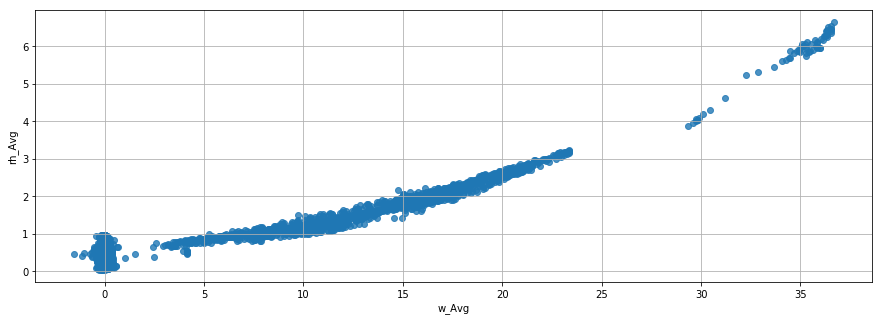

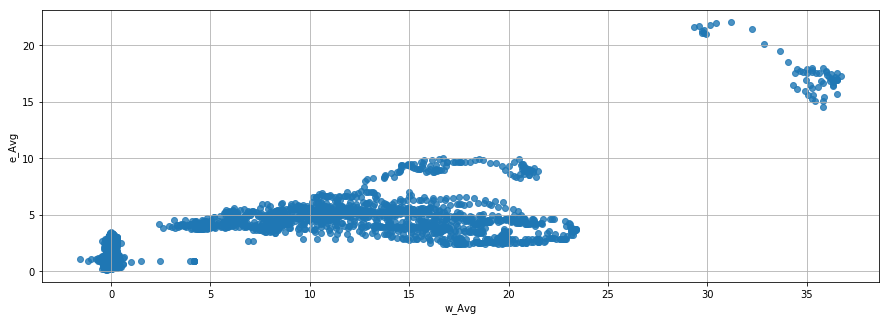

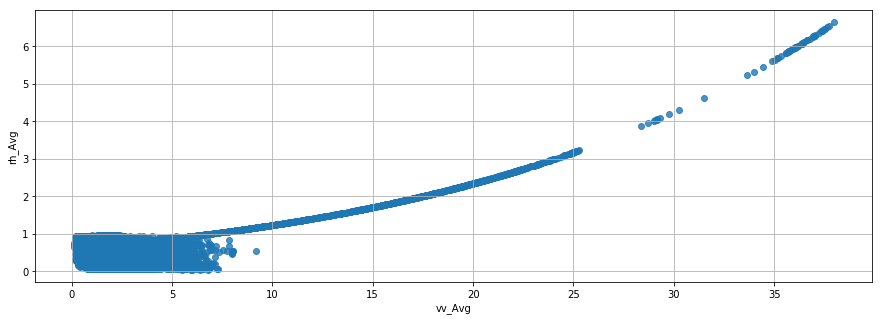

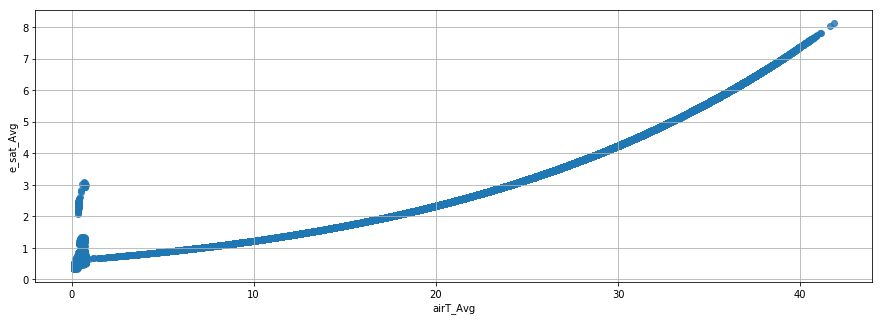

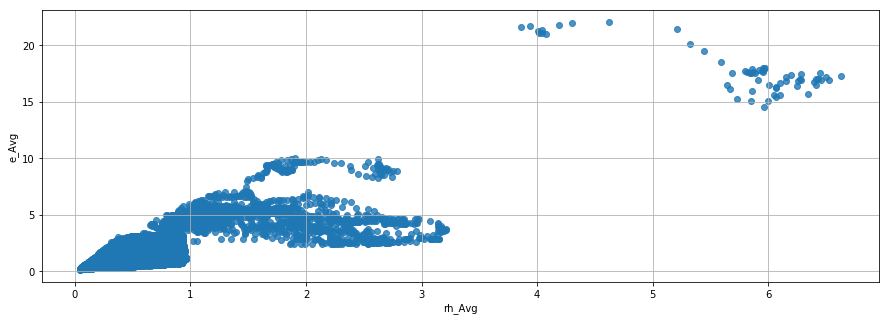

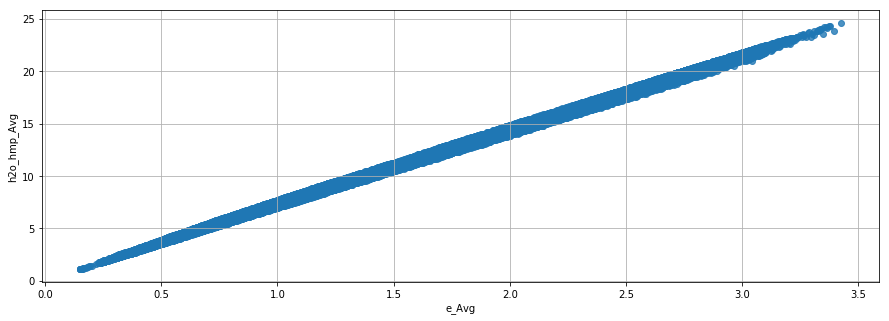

In [22]:
for i in range(0,len(Cols)):
    plt.figure(figsize=(15,5))
    sb_plot = sb.regplot(x = df[Cols[i][0]], y = df[Cols[i][1]],fit_reg=False)
    fig = sb_plot.get_figure()
    fig.savefig(fname = Cols[i][0] + " vs " + Cols[i][1] ,plt=2000)
    plt.grid()
    plt.show()